1. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

In [17]:
import pandas as pd
df=pd.read_csv('data_000637.txt',delimiter=',')[0:12000]
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
11995,1,0,139,3869200286,3251,0
11996,1,0,62,3869200286,3246,4
11997,1,0,58,3869200286,3246,11
11998,1,0,61,3869200286,3251,17


2. Find out the number of BX in a ORBIT (the value 'x').

In [2]:
df['BX_COUNTER'].count()

1310720

3. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [3]:
import time
stattime=0
endtime=0
starttime=time.time()
df=pd.read_csv('data_000637.txt',delimiter=',')
endtime=time.time()
print(endtime-starttime)

0.8317058086395264


4. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [4]:
import time
stattime=0
endtime=0
starttime=time.time_ns()
df=pd.read_csv('data_000637.txt',delimiter=',')
endtime=time.time_ns()
print(endtime-starttime)

847880500


5. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [7]:
import numpy as np
for i in range(len(df['HEAD'])):
    df['HEAD'][i]=np.random.randint(2)
print(df['HEAD'].iloc[0:12000])

0        0
1        0
2        0
3        0
4        0
        ..
11995    1
11996    0
11997    0
11998    0
11999    1
Name: HEAD, Length: 12000, dtype: int64


6. Create a new DataFrame that contains only the rows with HEAD=1.

In [9]:
df['newDataFrame']=df['HEAD']==1
print(df)

         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
0           0     0          123  3869200167        2374        26   
1           0     0          124  3869200167        2374        27   
2           0     0           63  3869200167        2553        28   
3           0     0           64  3869200167        2558        19   
4           0     0           64  3869200167        2760        25   
...       ...   ...          ...         ...         ...       ...   
1310715     0     0           62  3869211171         762        14   
1310716     1     1            4  3869211171         763        11   
1310717     1     0           64  3869211171         764         0   
1310718     0     0          139  3869211171         769         0   
1310719     0     0           61  3869211171         762        18   

         newDataFrame  
0               False  
1               False  
2               False  
3               False  
4               False  
...            

7. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

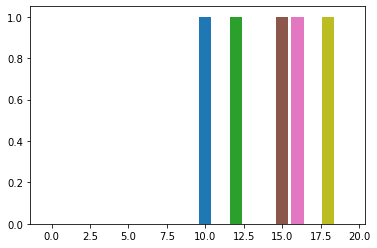

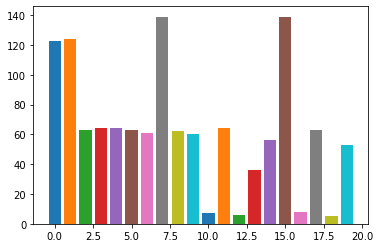

In [10]:
import matplotlib.pyplot as plt
for i in range(20):
    plt.bar(i,df['FPGA'][i])
plt.figure()
for i in range(20):
    plt.bar(i,df['TDC_CHANNEL'][i])

8. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [11]:
new_df=pd.value_counts(df['TDC_CHANNEL'])
new_df.iloc[0:3]

139    108059
64      66020
63      64642
Name: TDC_CHANNEL, dtype: int64

9. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [12]:
print(len(df[df['TDC_CHANNEL'] == 139]))
print(df['TDC_CHANNEL'].unique())

108059
[123 124  63  64  61 139  62  60   7   6  36  56   8   5  53  10  57  38
  58  59  54  51   1   2 127 128   4   3 117 121  45  48  46  47  12  13
  14  11  74  16  50  18  49 115  15  17  37  40  20  43 122 105 103  44
 112 108 106  41  42  25  68  24  23  26  29  31 100  33  22 119  73  65
  92  90 118  88 113  19  32  96 102  94  35 101 111  87 109  81  21  28
  75  78  89  76  27  79  72 107 110  91   9  95 114  97  98 120  80  67
 116  71  69  70  82  86  93  30  85  84  66  52  39  77 104  34  83 126
  99 125  55 130 138 137 129]
